## Multi-Agent System for News Writing (基於運算思維的新聞寫作多智能體系統)

In [1]:
# "protobuf<5" 是修正 protobuf 版本衝突的語法
# 安裝套件後，會彈出詢問是否【重新啟動工作階段】的訊息，不需理會，此訊息是因為套件會移除 colab 預設的 pillow & httpx package，改用較舊版本引起。
! pip install qdrant-client==1.12.2 litellm==1.56.6 tavily-python==0.5.0 fastembed==0.5.0 "protobuf<5"

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# 取得 環境變數
from dotenv import load_dotenv
import os

# 載入 .env 檔案
load_dotenv()

# 讀取環境變數
OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')
TAVILY_API_KEY = os.getenv('TAVILY_API_KEY')

# 檢查是否成功讀取
if OPENAI_API_KEY is None:
    raise ValueError("找不到 OPENAI_API_KEY")
if TAVILY_API_KEY is None:
    raise ValueError("找不到 TAVILY_API_KEY")

# 使用金鑰
print("金鑰讀取成功！")

金鑰讀取成功！


# 程式說明一、建立相關主題以及相對應問題


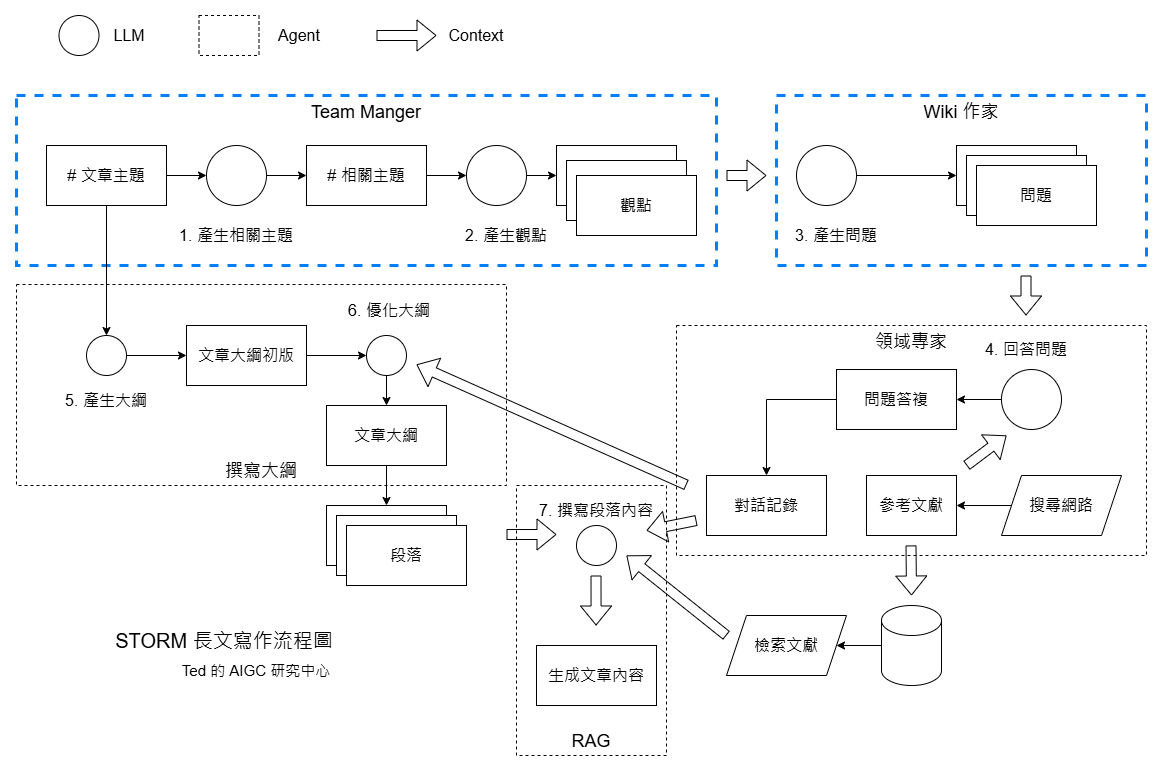

In [ ]:
from litellm import completion, acompletion
import json

In [ ]:
def generate_related_topics(topic: str) -> list[str]:
    system_prompt = """我想寫一篇關於某個主題的長篇文章。我會給你主題，我希望你能提出 3 個相關的子主題來擴展內容。"""

    user_prompt = """這裏是主題:\n\n主題:{topic}"""
    try:
        response = completion(
            api_key=OPENAI_API_KEY,
            model="gpt-3.5-turbo",
            messages=[{"content": system_prompt, "role": "system"}, {"content": user_prompt.format(topic=topic), "role": "user"}],
            temperature=0.5,
            max_tokens=200,
        )
        response = response.choices[0].message.content

        return response
    except Exception as e:
        print(f"Error in translation: {e}")


In [ ]:
topic = '建立一個專業的 LinkIn 首頁'
related_topics = generate_related_topics(topic)

In [ ]:
related_topics

'根據您的主題，這裡有三個相關的子主題來擴展內容：\n\n1. 個人資訊與專業形象建立\n2. 內容豐富的個人簡介與經歷展示\n3. 網絡關係的建立與維護'

In [ ]:
def generate_perspectives(topic: str, related_topics: str) -> list[str]:
    # 這裏有特別修正，請注意！！

    #system_prompt = """
    #你需要選擇一組由 3 位作家組成的團隊，他們將共同撰寫一篇關於這個主題的綜合性文章。每位作家都代表與此主題相關的不同觀點、角色或隸屬關系。
    #你可以使用其他相關主題作為靈感。對於每個角色，添加他們將重點關注的描述。請嚴格按照以下格式回答，不要添加任何額外內容：1. 第一位作家的可能職稱：觀點描述 \n\n 2. 第二位作家的可能職稱：觀點描述 \n\n...\n\n
    #"""

    system_prompt = """
    你需要選擇一組由 3 位作家組成的團隊，他們將共同撰寫一篇關於這個主題的綜合性文章。每位作家都代表與此主題相關的不同觀點、角色或隸屬關係。你可以使用其他相關主題作為靈感。對於每個角色，添加他們將重點關注的描述。請嚴格按照以下格式回答，不要添加任何額外內容：

    1. 第一位作家的職稱：第一位作家的觀點描述

    2. 第二位作家的職稱：第二位作家的觀點描述

    ...

    n. 第 n 位作家的職稱：第 n 位作家的觀點描述

    """

    user_prompt = """這裏是主題:\n\n主題:{topic}\n\n相關主題: {related_topics}"""
    try:

        response = completion(
            api_key = OPENAI_API_KEY,
            model="gpt-3.5-turbo",
            messages=[{ "content": system_prompt,"role": "system"},{ "content": user_prompt.format(topic=topic, related_topics=related_topics),"role": "user"}],
            temperature=0.5,
            max_tokens=500,
        )
        response = response.choices[0].message.content
        print(response)
        return response
    except Exception as e:
        print(f"Error in translation: {e}")


In [ ]:
perspectives = generate_perspectives(topic, related_topics)

1. 專業形象顧問：著重於如何最有效地展示個人資訊和專業形象，包括建議如何選擇適當的照片、撰寫引人注目的標題和簡介，以及確保個人資訊的完整性和準確性。

2. 內容編輯專家：專注於如何撰寫引人入勝的個人簡介，展示豐富的經歷和成就。此作家將關注如何組織內容、使用關鍵字和闡明獨特價值主張，以吸引潛在連結和招聘者的注意。

3. 社交關係經理：將著眼於建立和維護有效的線上社交關係。這位作家將強調如何主動連結同行、參與專業社群、分享有價值的內容，以擴展人脈圈並提高在 LinkedIn 上的影響力。


In [ ]:
perspectives = perspectives.split('\n\n')
perspectives

['1. 專業形象顧問：著重於如何最有效地展示個人資訊和專業形象，包括建議如何選擇適當的照片、撰寫引人注目的標題和簡介，以及確保個人資訊的完整性和準確性。',
 '2. 內容編輯專家：專注於如何撰寫引人入勝的個人簡介，展示豐富的經歷和成就。此作家將關注如何組織內容、使用關鍵字和闡明獨特價值主張，以吸引潛在連結和招聘者的注意。',
 '3. 社交關係經理：將著眼於建立和維護有效的線上社交關係。這位作家將強調如何主動連結同行、參與專業社群、分享有價值的內容，以擴展人脈圈並提高在 LinkedIn 上的影響力。']

In [ ]:
def generate_question(topic: str, perspective: str, history: list[str]):
    system_prompt = """
    你是一位經驗豐富的作家，想要編輯一篇關於特定主題的長篇文章。除了作為作家的身份外，你在研究主題時還有一個特定的觀點。
    現在，你正在與一位專家交談以獲取資訊。請提出好問題以獲取更有用的訊息。
    你一次只問一個問題，不要重複之前已經問過的問題。除了生成問題外，不要添加任何額外內容。
    你的問題應該與你想寫的主題相關。

    對話歷史：{history}
    """

    user_prompt = """這裏是主題:\n\n主題:{topic}\n\n你的特定觀點: {perspective}\n\問題:"""

    context = "\n".join(history)
    try:

        response = completion(
            api_key = OPENAI_API_KEY,
            model="gpt-3.5-turbo",
            messages=[{ "content": system_prompt.format(history=context),"role": "system"},{ "content": user_prompt.format(topic=topic, perspective=perspective),"role": "user"}],
            temperature=0.5,
            max_tokens=200,
        )
        response = response.choices[0].message.content

        return response
    except Exception as e:
        print(f"Error in translation: {e}")

In [ ]:
res = generate_question(topic, perspectives[0], [])
res

'在建立 LinkIn 首頁時，您認為哪些元素是最能引起他人注意並展現專業形象的關鍵？'

# 同學的練習
- 思考你要撰寫的幾個主題
- 重複執行上面幾個動作
- 給同學 5 分鐘的時間練習


# 程式說明二、與領域專家的討論

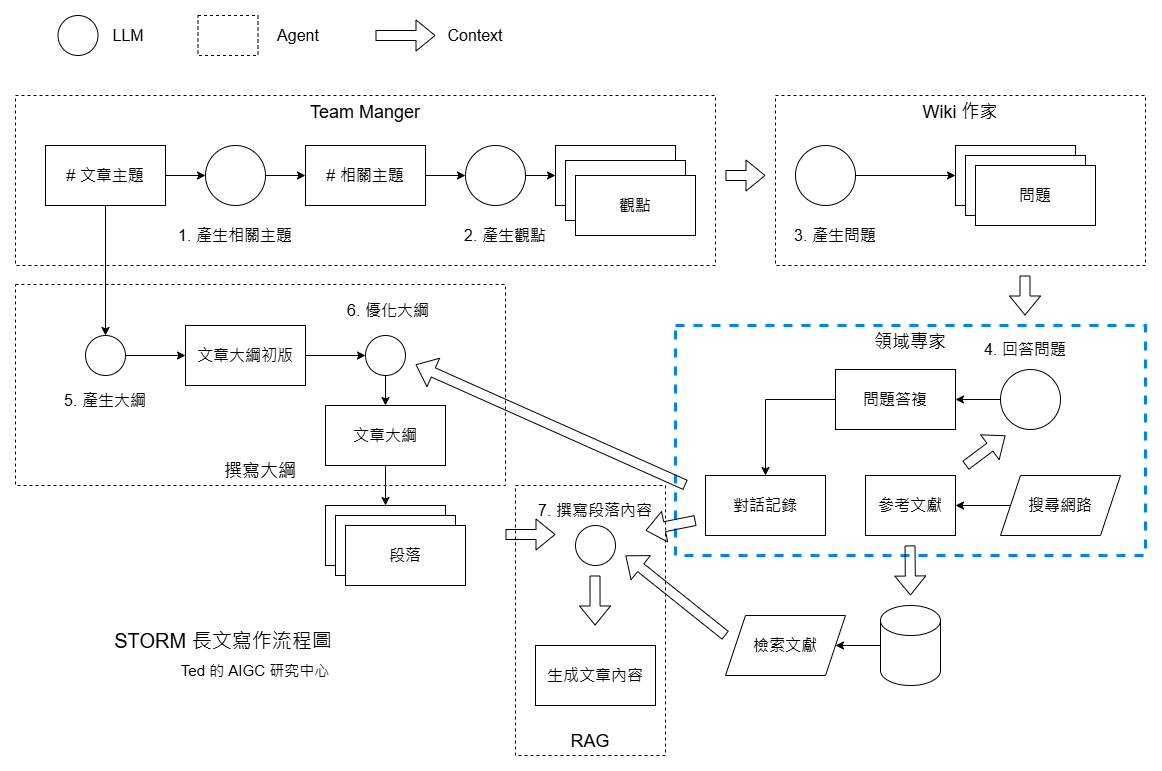

In [ ]:
def generate_answer(topic: str, question: str, context: str):
    system_prompt = """
    你是一位能有效運用資訊的專家。你正在與一位作家交談，該作家想撰寫一篇關於你所熟悉的主題的文章。
    你已經收集了相關資訊，現在將使用這些資訊來形成回應。請確保你的回應盡可能提供豐富資訊，並確保每個句子都由收集到的資訊支持。

    相關資訊：{context}
    """

    user_prompt = """這裏是主題:\n\n主題:{topic}\n\問題: {question}"""
    try:

        response = completion(
            api_key = OPENAI_API_KEY,
            model="gpt-3.5-turbo",
            messages=[{ "content": system_prompt.format(context=context),"role": "system"},{ "content": user_prompt.format(topic=topic, question=question),"role": "user"}],
            temperature=0.5,
            max_tokens=600,
        )
        response = response.choices[0].message.content

        return response
    except Exception as e:
        print(f"Error in translation: {e}")


In [ ]:
# # 設定環境變數
# from google.colab import userdata
# from tavily import TavilyClient

# # 建立 Tavily Search 的用戶端
# TAVILY_API_KEY = userdata.get('TAVILY_API_KEY')

# tavily = TavilyClient(api_key=TAVILY_API_KEY)

In [ ]:
all_conversations = []  # 這裏記錄的是所有的對話記錄
references = [] # 這裏記錄所有網路搜尋的結果
duplicate_references = set()
total_questions = 3 # 這裏設定每個觀點的問題詢問數量

# 這裏處理所有的特殊觀點
# 如果要產生所有觀點的問題請打開下面註解
#for p in perspectives:
for p in perspectives[:1]:
    print(f'產生 {p} 觀點問題：')
    history = []  # 這裏記錄目前這個觀點的對話記錄

    # 每個觀點都會詢問 {total_questions} 個問題
    for i in range(total_questions):
        # 產生問題
        question = generate_question(topic, p, history)
        print(f"QUESTION: {question}")

        # 增加問題記錄
        history.append(question)

        # 使用 Tavily search 來搜尋問題的網路資源
        tavily_response = tavily.search(query=question)
        results = tavily_response['results']

        # 所有搜尋到的資料我們會將它彙整到一個 context 結構裏面
        all_context = ""
        for result in results:
            all_context += result['content'] + "\n"

            # 是否之前已經有查詢到一樣的網絡資源？ 有重複的就跳過它
            if result['url'] in duplicate_references:
                continue

            # for 重複網絡資源判斷
            duplicate_references.add(result['url'])

            # 參考治療的儲存結果
            references.append({"title": result['title'], "source": result['url'], "content": result['content']})

        # 領域專家的回答
        answer = generate_answer(topic, question, all_context)

        # 將回覆記錄增加到 history 對話歷史記錄中
        print(f"ANSWER: {answer}")
        history.append(answer)

    # 將這次觀點的對話記錄存到所有對話記錄的結構中
    all_conversations.append(history)
print("DONE.")

產生 1. 專業形象顧問：著重於如何最有效地展示個人資訊和專業形象，包括建議如何選擇適當的照片、撰寫引人注目的標題和簡介，以及確保個人資訊的完整性和準確性。 觀點問題：
QUESTION: 在建立 LinkIn 首頁時，你認為在選擇適當的照片方面有哪些建議和注意事項？
ANSWER: 在建立專業的LinkedIn首頁時，選擇適當的照片是非常重要的一環。根據我收集到的資訊，以下是一些建議和注意事項：

1. **選擇Smart Casual的照片**：建議選擇一張比較smart casual風格的照片。這樣的照片既顯得專業又不會給人過於嚴肅的印象。

2. **避免使用畢業照**：盡量避免使用畢業照，因為這樣的照片可能會讓你看起來過於年輕或學生化，不夠專業。

3. **突出你的創意和創作性**：如果你從事創意或創作性的職位，可以在照片中展現一些生活感和創意，讓自己在LinkedIn上更具吸引力。

4. **確保臉部是焦點**：在照片中，讓你的臉部成為焦點，建議臉部佔整個畫面的60%大小，並且位於畫面的正中央，這樣能讓別人快速認識你。

5. **使用近照**：建議使用近期的照片，盡量貼近你當前的造型。這樣可以避免在面試時和LinkedIn照片造成觀感上的落差。

6. **表情自信微笑**：在照片中展現自信微笑的表情，避免過於嚴肅或太過放鬆的表情。

7. **穿著正式專業**：選擇穿著有領子的衣服，看起來比較正式專業，這樣能給人一種正式的印象。

8. **背景色應該簡潔**：在拍攝照
QUESTION: 在建立專業的LinkedIn首頁時，如何在照片中展現自信和專業形象？
ANSWER: 在建立專業的LinkedIn首頁時，在照片中展現自信和專業形象是非常重要的。首先，您可以考慮使用高質量的照片來展示您的專業精神、自信和平易近人。一個成功的LinkedIn照片應該展現出自信的表情和微笑，但不要顯得過於嚴肅。這種自信和微笑的表情可以讓觀眾感受到您的友好和開放。

此外，在照片中的姿勢也非常重要。您應該讓姿勢自然放鬆，不需要做出過多特別的動作。這樣可以展現出您的自信和專業形象，同時讓觀眾感受到您的親和力。

另外，穿著也是展現專業形象的關鍵之一。建議穿著有領子的衣服，看起來會比較正式和專業。選擇適合的服裝可以幫助您在照片中展現出您的專業形象，給人留下深刻印象。



# 同學的練習
- 挑選一個自己想要測試的主題
- 依序執行，並且確認正確無誤
- 給同學 5 分鐘的時間練習


# 程式說明三、建立大綱

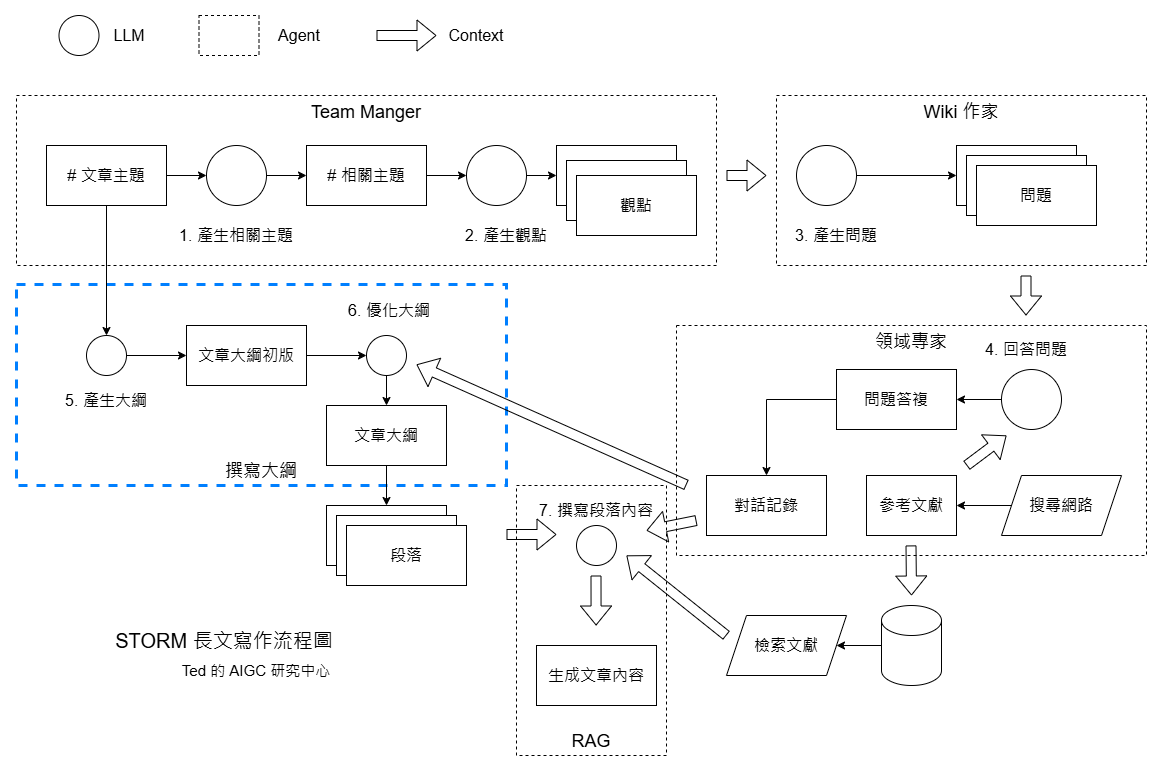

In [ ]:
def generate_outline(topic: str) -> str:
    """
    產生初版文章大綱，請注意提示詞有做改進。
    """

    # system_prompt = """
    # 為一個特定主題撰寫文章大綱。
    # 這是你寫作的格式：
    # 使用“# 標題”來指示節的標題，“## 標題”來指示小節的標題，“### 標題”來指示小小節的標題，依此類推。
    # 不要包含其他資訊。請使用繁體中文。
    # """

    system_prompt = """
    為一個特定主題撰寫文章大綱。下方是你寫作的格式：

    1. 使用“# 標題”來指示節的標題。
    2. 使用“## 標題”來指示小節的標題。
    3. 使用“-”符號來列出小節中的要點。
    4. 每個節和小節之間請確保有空行。
    5. 大綱應僅包含標題和要點，不應包含其他額外資訊。
    6. 請使用繁體中文。
    """

    user_prompt = """這裏是主題:\n\n主題:{topic}"""

    try:

        response = completion(
            api_key = OPENAI_API_KEY,
            model="gpt-3.5-turbo",
            messages=[{ "content": system_prompt,"role": "system"},{ "content": user_prompt.format(topic=topic),"role": "user"}],
            temperature=0.5,
            max_tokens=500,
        )
        response = response.choices[0].message.content

        return response
    except Exception as e:
        print(f"Error in translation: {e}")


In [ ]:
# 使用使用者指定的主題，產生主題大綱初版
outline = generate_outline(topic)

In [ ]:
print(outline) # generated outline

# 建立一個專業的 LinkIn 首頁

## 簡介
- 介紹 LinkedIn 的重要性和影響力
- 目的：建立一個專業形象，擴展人脈和職涯機會

## 製作個人資料
- 上傳專業照片
- 撰寫吸引人的個人簡介
- 詳細填寫個人資訊，包括教育、工作經驗等

## 強化專業背景
- 強調專業技能和專長
- 添加專業認證和證書
- 發表專業文章或分享相關內容

## 擴展人脈
- 連結同事、同學和業界專家
- 參與社群討論和產業活動
- 詢問推薦信，提升信譽和可信度

## 更新動態和互動
- 定期更新個人動態和分享內容
- 回應留言和私訊
- 參與他人的貼文和留言，建立互動和關係

## 維護專業形象
- 定期檢視個人資料，更新最新資訊
- 監控個人動態和留言，確保專業形象
- 參與專業培訓和線上課程，持續學習和成長


In [ ]:
def refine_outline(topic: str, outline: str, conversation: list[list[str]]) -> str:
    system_prompt = """
    我希望你改善一篇關於【{topic}】主題的文章大綱。
    你已經有一個涵蓋了一般資訊的初稿大綱，現在你希望基於與專家的對話中學到的資訊來改進它，使其更加全面。

    這是你寫作的格式：
    使用“# 標題”來指示節的標題，“## 標題”來指示小節的標題，“### 標題”來指示小小節的標題，依此類推。不要包含其他資訊。請使用繁體中文。

    初稿大綱：{outline}
    """

    user_prompt = """學到的資訊: {conversation}"""
    flattened_list = [item for sublist in conversation for item in sublist]
    context = ''.join(flattened_list)
    try:
        response = completion(
            api_key = OPENAI_API_KEY,
            model="gpt-3.5-turbo",
            messages=[{ "content": system_prompt.format(topic=topic, outline=outline),"role": "system"},{ "content": user_prompt.format(conversation=context),"role": "user"}],
            temperature=0.5,
            max_tokens=800,
        )
        response = response.choices[0].message.content

        return response
    except Exception as e:
        print(f"Error in translation: {e}")

In [ ]:
refined_outline = refine_outline(topic, outline, all_conversations)

In [ ]:
print(refined_outline) # refined outline

# 建立一個專業的 LinkIn 首頁

## 簡介
- 介紹 LinkedIn 的重要性和影響力
- 目的：建立一個專業形象，擴展人脈和職涯機會

## 製作個人資料
- 上傳專業照片
- 撰寫吸引人的個人簡介
- 詳細填寫個人資訊，包括教育、工作經驗等

## 強化專業背景
- 強調專業技能和專長
- 添加專業認證和證書
- 發表專業文章或分享相關內容

## 擴展人脈
- 連結同事、同學和業界專家
- 參與社群討論和產業活動
- 詢問推薦信，提升信譽和可信度

## 更新動態和互動
- 定期更新個人動態和分享內容
- 回應留言和私訊
- 參與他人的貼文和留言，建立互動和關係

## 維護專業形象
- 定期檢視個人資料，更新最新資訊
- 監控個人動態和留言，確保專業形象
- 參與專業培訓和線上課程，持續學習和成長

## 選擇適當的照片
- **照片的清晰度和質量**：確保選擇高清晰度、清晰的照片
- **臉部在畫面中的比例**：臉部應在畫面中央，佔60%-70%大小
- **選擇適合的背景**：簡潔、乾淨的背景，避免分散注意力
- **穿著適合您工作的服飾**：展現專業和適應力
- **避免使用自拍照**：給人不專業或隨意印象
- **照片應該是獨照**：確保您是焦點，避免分散注意力
- **光線和曝光**：確保充足光線，避免陰暗或過曝情況

## 展現自信和專業形象
- 自信微笑的表情
- 自然放鬆的姿勢
- 穿著有領子的衣服
- 簡潔不


# 同學的練習
- 延續剛剛挑選的主題
- 接續執行，並且確認正確無誤
- 給同學 5 分鐘的時間練習

# 程式說明四、RAG & 段落內容的撰寫

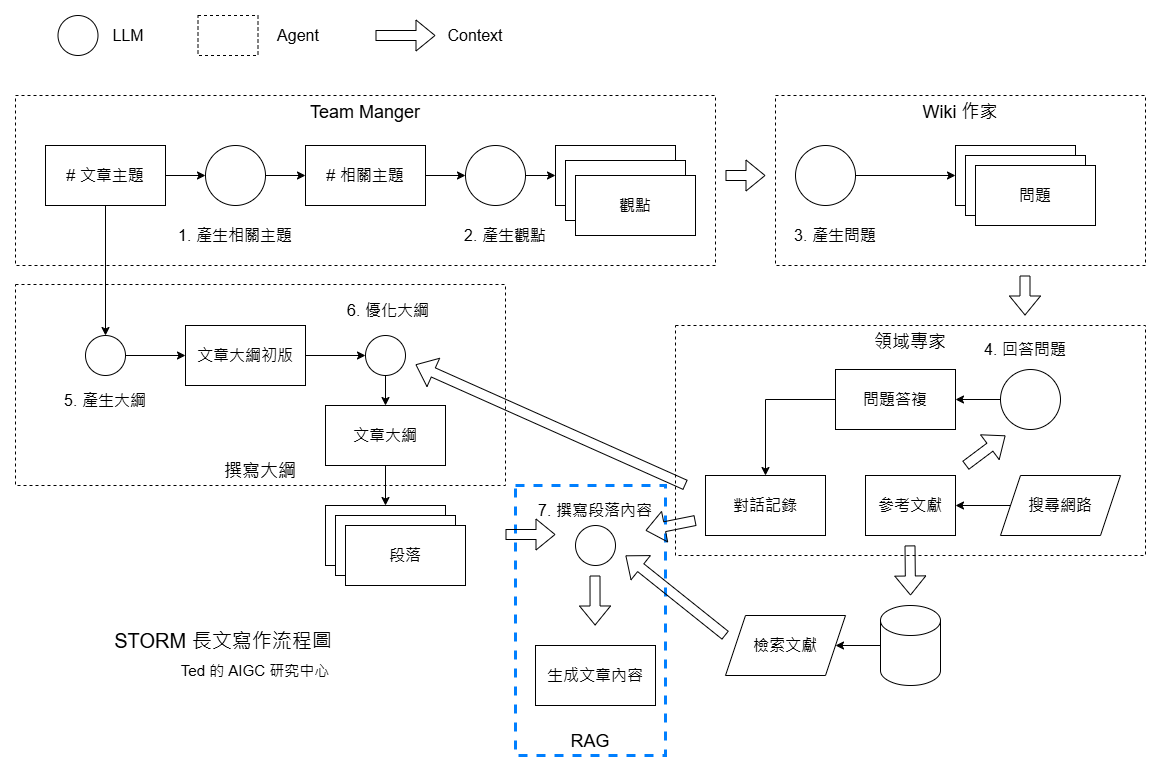

In [ ]:
# 切割為撰寫段落
rr = refined_outline.split("\n\n")
rr

['# 建立一個專業的 LinkIn 首頁',
 '## 簡介\n- 介紹 LinkedIn 的重要性和影響力\n- 目的：建立一個專業形象，擴展人脈和職涯機會',
 '## 製作個人資料\n- 上傳專業照片\n- 撰寫吸引人的個人簡介\n- 詳細填寫個人資訊，包括教育、工作經驗等',
 '## 強化專業背景\n- 強調專業技能和專長\n- 添加專業認證和證書\n- 發表專業文章或分享相關內容',
 '## 擴展人脈\n- 連結同事、同學和業界專家\n- 參與社群討論和產業活動\n- 詢問推薦信，提升信譽和可信度',
 '## 更新動態和互動\n- 定期更新個人動態和分享內容\n- 回應留言和私訊\n- 參與他人的貼文和留言，建立互動和關係',
 '## 維護專業形象\n- 定期檢視個人資料，更新最新資訊\n- 監控個人動態和留言，確保專業形象\n- 參與專業培訓和線上課程，持續學習和成長',
 '## 選擇適當的照片\n- **照片的清晰度和質量**：確保選擇高清晰度、清晰的照片\n- **臉部在畫面中的比例**：臉部應在畫面中央，佔60%-70%大小\n- **選擇適合的背景**：簡潔、乾淨的背景，避免分散注意力\n- **穿著適合您工作的服飾**：展現專業和適應力\n- **避免使用自拍照**：給人不專業或隨意印象\n- **照片應該是獨照**：確保您是焦點，避免分散注意力\n- **光線和曝光**：確保充足光線，避免陰暗或過曝情況',
 '## 展現自信和專業形象\n- 自信微笑的表情\n- 自然放鬆的姿勢\n- 穿著有領子的衣服\n- 簡潔不']

In [ ]:
# fastembed 是 qdrant 預設使用的 embedding 工具, 細節可參考： https://github.com/qdrant/fastembed
from fastembed import TextEmbedding
from typing import List

In [ ]:
# 建立 RAG data source
documents = []
metadata = []
ids = []
for i in range(len(references)):
    documents.append(references[i]['title'] + " " + references[i]["content"])
    metadata.append({"source":references[i]["source"]})
    ids.append(i)

In [ ]:
from qdrant_client import QdrantClient

client = QdrantClient(":memory:")

# 如果想要使用其他 embedding model，可如下指定
# client.set_model("sentence-transformers/all-MiniLM-L6-v2")
# 中文 embedding model
client.set_model("BAAI/bge-small-zh-v1.5")

# fastembed 支援的 models: https://qdrant.github.io/fastembed/examples/Supported_Models

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/739 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/439k [00:00<?, ?B/s]

model_optimized.onnx:   0%|          | 0.00/94.8M [00:00<?, ?B/s]

In [ ]:
client.delete_collection(collection_name="demo_collection")

True

In [ ]:
# 建立 vector db
ids = client.add(
    collection_name="demo_collection",
    documents=documents,
    metadata=metadata,
    ids=ids
)

In [ ]:
query = rr[1]
query

'## 簡介\n- 介紹 LinkedIn 的重要性和影響力\n- 目的：建立一個專業形象，擴展人脈和職涯機會'

## RAG 檢索測試

In [ ]:
search_result = client.query(
    collection_name="demo_collection",
    query_text=rr[1],
    limit=5
)

for s in search_result:
    print(s.metadata['source'])
    print(s.id)


https://crossing.cw.com.tw/article/18648
6
https://cn.linkedin.com/pulse/%E5%A6%82%E4%BD%95%E4%BD%BF%E7%94%A8-chatgpt-%E5%9C%A8-linkedin-%E4%B8%8A%E6%89%93%E9%80%A0%E5%80%8B%E4%BA%BA%E5%B0%88%E6%A5%AD%E5%BD%A2%E8%B1%A1-wei-cheng-lin
8
https://betweengos.com/ultimate-linkedin-guide-for-newbies-enhance-your-profile/
7
https://www.yourator.co/articles/483
1
https://www.photoai.me/zh/blog/10-tips-for-creating-a-great-linkedin-profile-with-ai-photos
5


In [ ]:
search_result

[QueryResponse(id=6, embedding=None, sparse_embedding=None, metadata={'document': '「無權威影響力」有助建立專家形象？    LinkedIn 重度使用者的告白 首先，要先完善自己的LinkedIn 個人檔案，這是你在這個平台上展現自己的第一步。請確保個人簡介清晰明瞭，並附上一張專業的照片，列出你的工作經歷和專業技能', 'source': 'https://crossing.cw.com.tw/article/18648'}, document='「無權威影響力」有助建立專家形象？    LinkedIn 重度使用者的告白 首先，要先完善自己的LinkedIn 個人檔案，這是你在這個平台上展現自己的第一步。請確保個人簡介清晰明瞭，並附上一張專業的照片，列出你的工作經歷和專業技能', score=0.7220793979275903),
 QueryResponse(id=8, embedding=None, sparse_embedding=None, metadata={'document': '如何使用ChatGPT 在LinkedIn 上打造個人專業形象 - 领英 優化LinkedIn 個人資料：首先，您需要完善自己的LinkedIn 個人資料。包括在個人簡介中使用關鍵詞、添加工作經歷和教育背景、上傳專業頭像和封面照片等等。你', 'source': 'https://cn.linkedin.com/pulse/%E5%A6%82%E4%BD%95%E4%BD%BF%E7%94%A8-chatgpt-%E5%9C%A8-linkedin-%E4%B8%8A%E6%89%93%E9%80%A0%E5%80%8B%E4%BA%BA%E5%B0%88%E6%A5%AD%E5%BD%A2%E8%B1%A1-wei-cheng-lin'}, document='如何使用ChatGPT 在LinkedIn 上打造個人專業形象 - 领英 優化LinkedIn 個人資料：首先，您需要完善自己的LinkedIn 個人資料。包括在個人簡介中使用關鍵詞、添加工作經歷和教育背景、上傳專業頭像和封面照片等等。你', score=0.696087005744217),
 QueryResponse(id=

## 撰寫段落

In [ ]:
def write_section(section: str) -> str:
    """
    撰寫段落文章
    """

    # 檢索該段落相關的網路資料
    search_result = client.query(
        collection_name="demo_collection",
        query_text=section,
        limit=5
    )

    # 產生參考文獻的文字格式
    references = generate_references_string(search_result)


    system_prompt = """
    你是寫作方面的專家。我會給你一個部落格的某一節的大綱和幾個參考資料。你需要使用提供的參考資料來生成該節的文章。
    你必須使用給定的來源來引用你的寫作。不要包含其他資訊。在這個格式中為每個句子包含“參考編號”：[ref_id]。你的回應必須以Markdown格式呈現。

    參考資料：{references}
    """


    user_prompt = """某一節的大綱: {section}"""

    try:
        response = completion(
            api_key = OPENAI_API_KEY,
            model="gpt-3.5-turbo",
            messages=[{ "content": system_prompt.format(references=references),"role": "system"},{ "content": user_prompt.format(section=section),"role": "user"}],
            temperature=0.5,
            max_tokens=1500,
        )
        response = response.choices[0].message.content

        return response
    except Exception as e:
        print(f"Error in translation: {e}")

In [ ]:
def generate_references_string(references):
    output = []
    for ref in references:
        ref_id = ref.id
        ref_url = ref.metadata.get('source', '')
        ref_content = ref.metadata.get('document', '')

        # Construct a formatted string for each reference
        reference_str = f"Reference ID:\n {ref_id}\nURL: {ref_url}\nContent: {ref_content}\n"

        # Append the formatted reference string to the output list
        output.append(reference_str)

    return '\n'.join(output)

In [ ]:
article = ""

article = rr[0]
for section_outline in rr[1::]: # 列表切片語法，意思是從 rr 的第二個元素（索引為 1）開始，一直到列表的結尾
    sec = write_section(section_outline)
    article += sec + "\n\n"

print("article DONE!")

article DONE!


In [ ]:
print(article)

# 建立一個專業的 LinkIn 首頁# 簡介

在現代職場中，建立一個強大的專業形象至關重要。社交媒體平台如LinkedIn已成為個人品牌建立的重要工具，具有無可否認的影響力和重要性。LinkedIn不僅是一個尋找工作機會的平台，更是一個展示個人專業形象、擴展人脈和職涯發展的重要渠道。透過精心打造個人檔案，我們可以有效地展示自己的專業能力，吸引潛在雇主或業務合作夥伴的注意，從而開啟更多職涯機會。因此，正確地利用LinkedIn平台成為建立專業形象和擴展人脈的關鍵。 [1][5][6][8]

## 製作個人資料

在LinkedIn上建立個人專業形象是非常重要的，以下是一些關鍵步驟來製作您的個人資料：

1. **上傳專業照片**：您的LinkedIn頭像和封面照片是在第一眼給人的印象，因此選擇一張專業且具吸引力的照片至關重要。這些照片應該清晰、高質量，展示您的自信和專業形象[1]。

2. **撰寫吸引人的個人簡介**：個人簡介是讓人快速了解您專業背景和價值主張的地方。使用關鍵詞來描述您的專業特長，並確保簡潔明瞭。一個引人入勝的個人簡介可以吸引更多的注意力和機會[8]。

3. **詳細填寫個人資訊**：在LinkedIn個人檔案中詳細填寫您的教育背景、工作經驗、技能專長等資訊。這些資訊可以幫助他人更好地了解您的專業背景和價值，也有助於建立您在特定領域的專家形象[8]。

通過以上這些步驟，您可以打造出一個引人注目且具有專業性的LinkedIn個人資料，提升自己在這個專業社交平台上的形象和可見度。

## 強化專業背景

在 LinkedIn 上強調自己的專業背景是建立個人專業形象的重要一環。以下是幾個有效的方法：

1. **強調專業技能和專長**：在個人檔案中清楚列出你的專業技能和專長，這有助於其他用戶了解你的專業能力和價值[6]。

2. **添加專業認證和證書**：如果你持有任何相關的專業認證或證書，務必在個人檔案中加以展示。這些證明可以增加你的專業可信度，讓其他人對你的專業知識有更多信心[8]。

3. **發表專業文章或分享相關內容**：在 LinkedIn 上發表專業文章或分享相關內容是展示你專業知識和見解的好方法。這不僅可以建立你在行業中的專業形象，還可以吸引更多的關注和互動[8]。

透過以上方法，你可以有效地強化自己的專業背景，在 Linke

In [ ]:
with open('article_claude_1.md', 'w') as fout:
    fout.write(article)

In [ ]:
references[5]

{'title': '使用AI 照片創建精彩LinkedIn 個人資料的10 個技巧 - PhotoAI.me',
 'source': 'https://www.photoai.me/zh/blog/10-tips-for-creating-a-great-linkedin-profile-with-ai-photos',
 'content': '使用高質量的照片來展示您的專業精神、自信和平易近人。考慮使用PhotoAI.me 的AI 照片生成器Linkedin Pack來增強您的個人資料圖片並產生令人難忘的影響。'}

# 同學的練習
- 延續剛剛挑選的主題，接續執行，確認正確無誤
- 你可以使用 https://markdownlivepreview.com/ 來查看生成的結果
- 給同學 5 分鐘的時間練習